Import Dependencies

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import seaborn as sns

Import/Read CSV Files

In [3]:
Walmart=pd.read_csv("Walmart.csv")
Walmart.head(10)

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106
5,1,12-03-2010,1439541.59,0,57.79,2.667,211.380643,8.106
6,1,19-03-2010,1472515.79,0,54.58,2.720,211.215635,8.106
7,1,26-03-2010,1404429.92,0,51.45,2.732,211.018042,8.106
8,1,02-04-2010,1594968.28,0,62.27,2.719,210.820450,7.808
9,1,09-04-2010,1545418.53,0,65.86,2.770,210.622857,7.808


Inspect Data

In [4]:
Walmart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Weekly_Sales  6435 non-null   float64
 3   Holiday_Flag  6435 non-null   int64  
 4   Temperature   6435 non-null   float64
 5   Fuel_Price    6435 non-null   float64
 6   CPI           6435 non-null   float64
 7   Unemployment  6435 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 402.3+ KB


In [5]:
#Row/column counts
Walmart.shape

(6435, 8)

In [6]:
#Column summary totals/counts
Walmart.describe(include="all")

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
count,6435.000000,6435,6.435000e+03,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000
unique,NaN,143,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,15-06-2012,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,45,NaN,NaN,NaN,NaN,NaN,NaN
mean,23.000000,NaN,1.046965e+06,0.069930,60.663782,3.358607,171.578394,7.999151
std,12.988182,NaN,5.643666e+05,0.255049,18.444933,0.459020,39.356712,1.875885
min,1.000000,NaN,2.099862e+05,0.000000,-2.060000,2.472000,126.064000,3.879000
25%,12.000000,NaN,5.533501e+05,0.000000,47.460000,2.933000,131.735000,6.891000
50%,23.000000,NaN,9.607460e+05,0.000000,62.670000,3.445000,182.616521,7.874000
75%,34.000000,NaN,1.420159e+06,0.000000,74.940000,3.735000,212.743293,8.622000


In [7]:
#Find min and max Date
print(Walmart.Date.max())
print(Walmart.Date.min())

31-12-2010
01-04-2011


NOTE: Data set range from December 31, 2010-January 4, 2011 
Walmart Data Sets are outdated -- API is not for public use must register as a Seller (only Developer/Affiliates)
In retrospect finding a topic with more up-to-date data would have been preferable -- retailers are not exactly quick to share data with potential competitors 

In [8]:
#Find min and max Weekly_Sales totals
print(Walmart.Weekly_Sales.max())
print(Walmart.Weekly_Sales.min())

3818686.45
209986.25


Clean Data

In [9]:
#Rename column headers
Walmart2= Walmart.rename(columns={'Store': 'Store Number', 'Date': 'Week Of','Weekly_Sales': 'Sales',
                                  'Holiday_Flag': 'Holiday during Week', 'Temperature': 'Avg. Weekly Temp',
                                  'Fuel_Price': 'Regional Fuel Price Avg.','CPI': 'Consumer Price Index', 
                                  'Unemployment': 'Unemployment Rate'})
Walmart2.head(2)

,Store Number,Week Of,Sales,Holiday during Week,Avg. Weekly Temp,Regional Fuel Price Avg.,Consumer Price Index,Unemployment Rate
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106


In [10]:
#Sort by date
Walmart3=Walmart2.sort_values('Week Of',ascending=False)
Walmart3.head(10)

,Store Number,Week Of,Sales,Holiday during Week,Avg. Weekly Temp,Regional Fuel Price Avg.,Consumer Price Index,Unemployment Rate
4623,33,31-12-2010,219804.85,1,52.91,3.148,127.087677,9.265
2335,17,31-12-2010,635862.55,1,20.79,2.868,127.087677,6.885
1906,14,31-12-2010,1623716.46,1,29.67,3.179,182.571448,8.724
3479,25,31-12-2010,623092.54,1,25.89,3.179,204.643227,7.484
5624,40,31-12-2010,811318.30,1,19.29,3.177,132.815032,5.287
6196,44,31-12-2010,241937.11,1,26.79,2.868,127.087677,7.610
3193,23,31-12-2010,1169773.85,1,19.05,3.177,132.815032,5.287
6053,43,31-12-2010,534740.30,1,48.61,2.943,203.417684,10.210
333,3,31-12-2010,382677.76,1,53.20,2.943,214.698647,7.564
3765,27,31-12-2010,1440963.00,1,29.59,3.336,136.665265,8.021


Machine Learning: Regression Model -- 
Sales Predictions

In [11]:
#Search for highest Weekly Sales Total and print top 20 rows
Walmart3.nlargest(20,'Sales')

,Store Number,Week Of,Sales,Holiday during Week,Avg. Weekly Temp,Regional Fuel Price Avg.,Consumer Price Index,Unemployment Rate
1905,14,24-12-2010,3818686.45,0,30.59,3.141,182.544590,8.724
2763,20,24-12-2010,3766687.43,0,25.17,3.141,204.637673,7.484
1333,10,24-12-2010,3749057.69,0,57.06,3.236,126.983581,9.003
527,4,23-12-2011,3676388.98,0,35.92,3.103,129.984548,5.143
1762,13,24-12-2010,3595903.20,0,34.90,2.846,126.983581,7.795
1814,13,23-12-2011,3556766.03,0,24.76,3.186,129.984548,6.392
2815,20,23-12-2011,3555371.03,0,40.19,3.389,212.236040,7.082
475,4,24-12-2010,3526713.39,0,43.21,2.887,126.983581,7.127
1385,10,23-12-2011,3487986.89,0,48.36,3.541,129.984548,7.874
189,2,24-12-2010,3436007.68,0,49.97,2.886,211.064660,8.163


TRAIN, TEST, SPLIT

In [12]:
X = Walmart2.drop(['Week Of', 'Sales'],axis=1)
y = Walmart2.Sales

In [13]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.20,random_state=20)
print("\nX_train:\n")
print(X_train.head())
print(X_train.shape)

print("\nX_test:\n")
print(X_test.head())
print(X_test.shape)


X_train:

      Store Number  Holiday during Week  Avg. Weekly Temp  \
1156             9                    0             66.07   
5102            36                    0             58.31   
3293            24                    0             36.73   
2322            17                    0             60.07   
5650            40                    0             65.25   

      Regional Fuel Price Avg.  Consumer Price Index  Unemployment Rate  
1156                     2.780            213.899046              6.384  
5102                     3.133            217.878134              7.716  
3293                     2.919            131.735000              8.326  
2322                     2.853            126.234600              6.885  
5650                     3.815            135.446800              4.584  
(5148, 6)

X_test:

      Store Number  Holiday during Week  Avg. Weekly Temp  \
3148            23                    0             26.70   
4358            31                  

In [24]:
# add missing dummy variables to testing set
missing_col = Dummies.columns.tolist()
X_dummies = X.reindex(columns=missing_col).fillna(0)
X_dummies

NameError: name 'Dummies' is not defined

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression

In [ ]:
Reg_Model = LinearRegression()

Based on Variance output the calculated projections are sound.

Plot the Data

<AxesSubplot:title={'center':'Sales Per Store'}, xlabel='Store Number', ylabel='Weekly Sales Totals in Billions'>

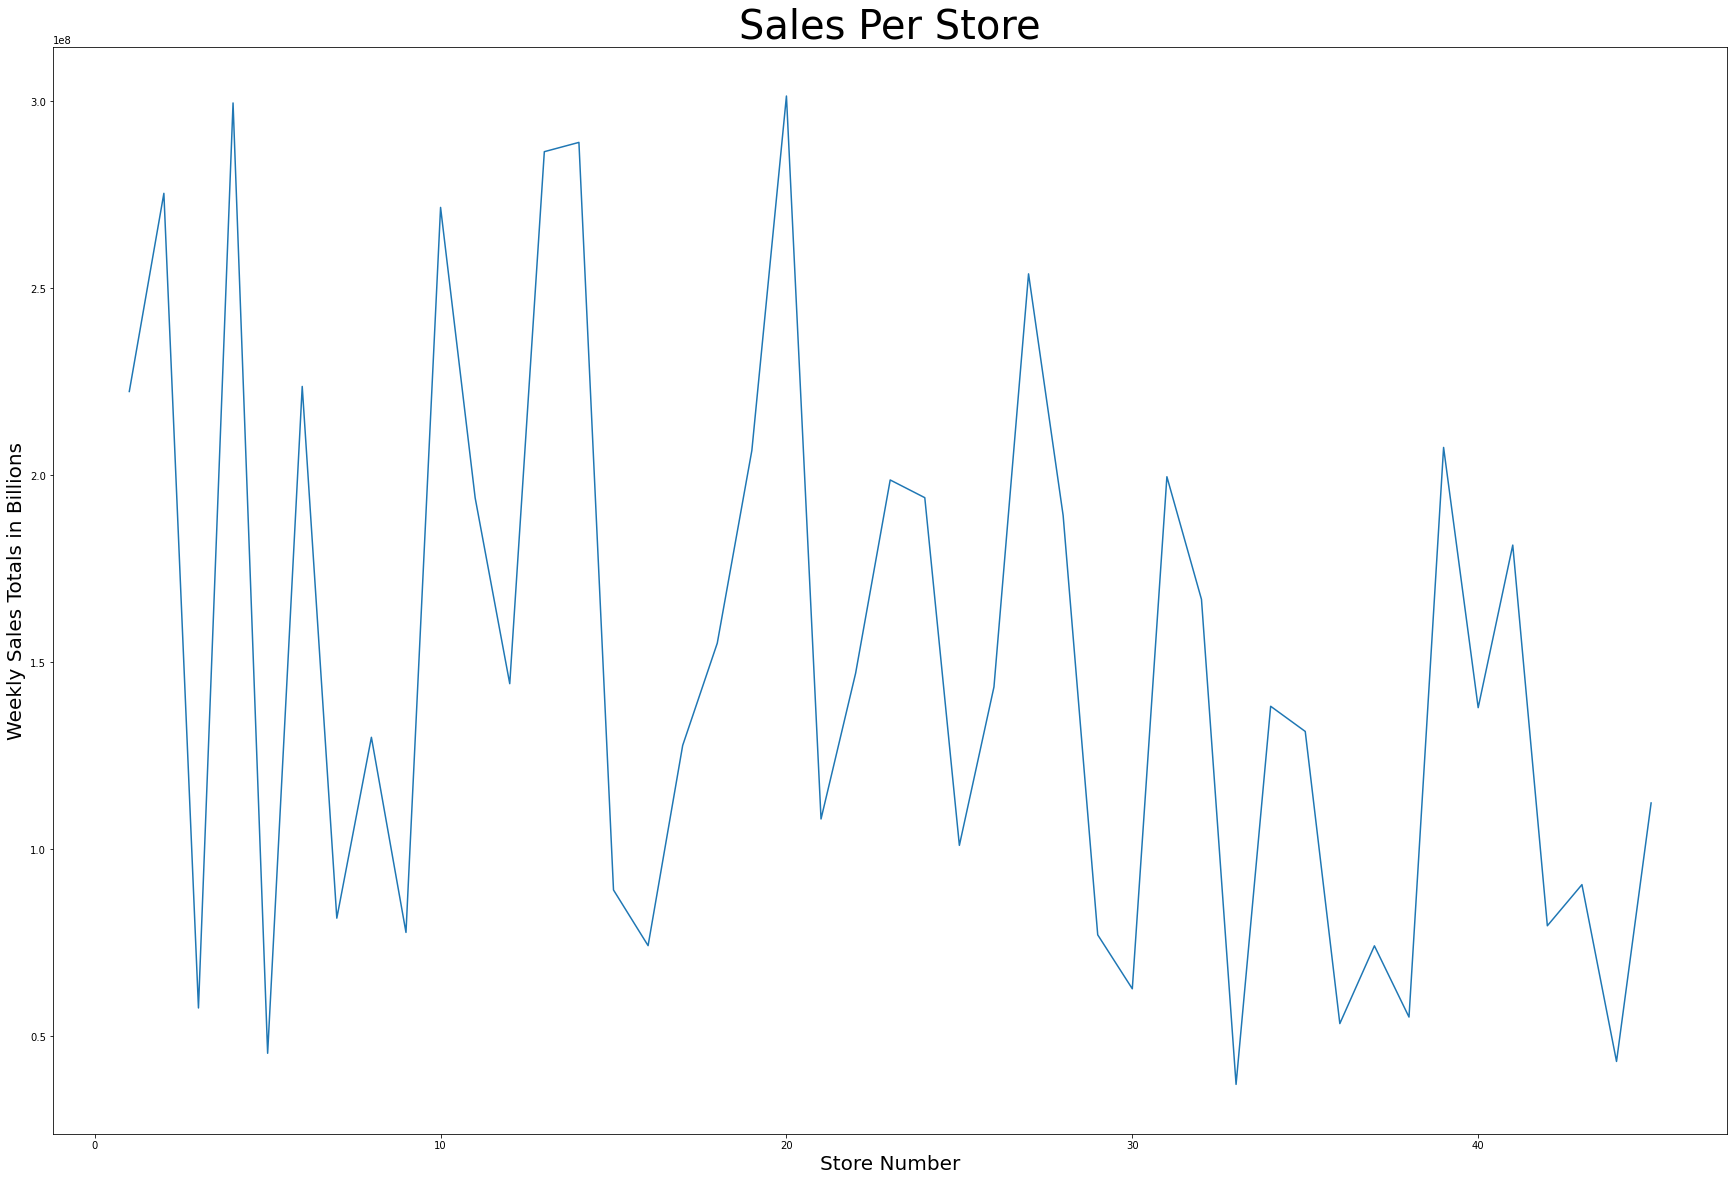

In [23]:


plt.plot(merge_df[(merge_df.Store==1)].DateTimeObj, merge_df[(merge_df.Store==1)].Weekly_Sales, 'ro')
plt.show()



C:\Users\Stephanie\Python\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


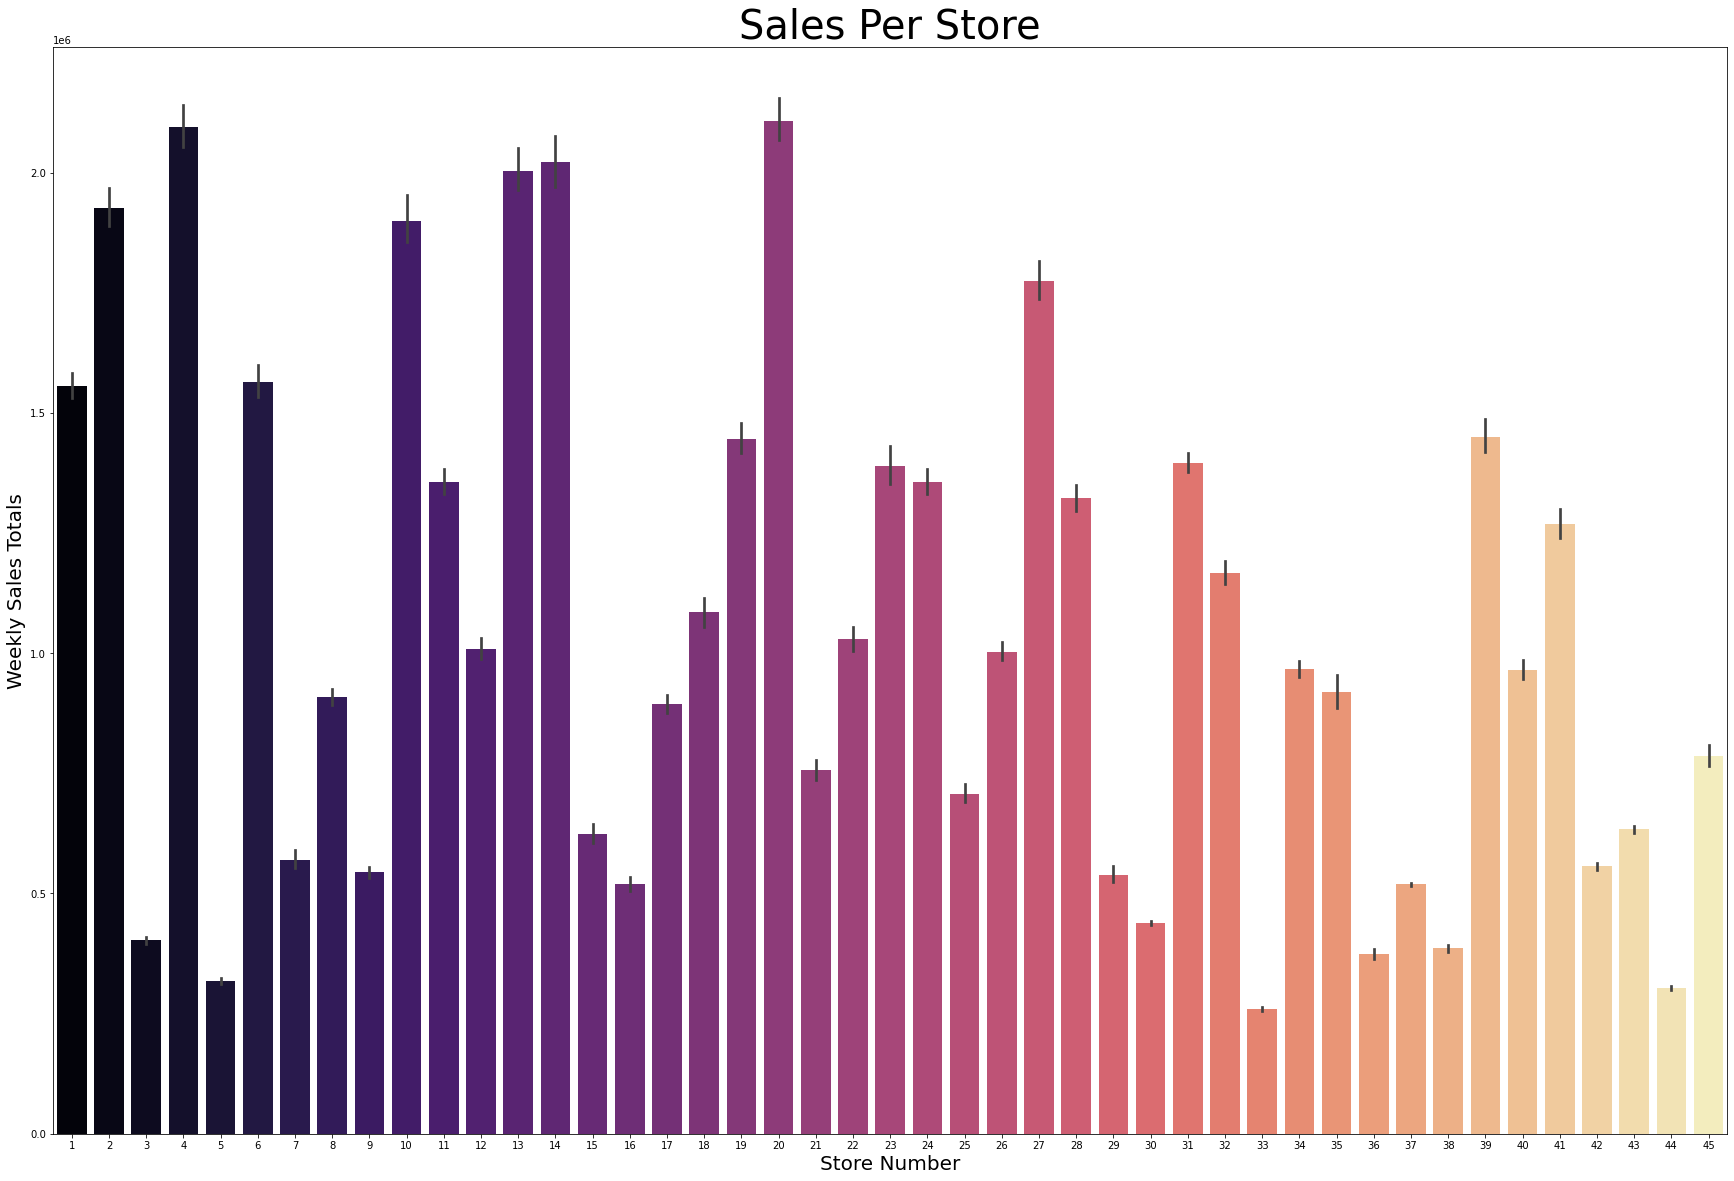

In [20]:
plt.rcParams['figure.figsize'] = (30, 20)
sns.barplot(Walmart3['Store Number'],Walmart3['Sales'],palette='magma')
plt.title('Sales Per Store', fontsize = 40)
plt.xlabel('Store Number', fontsize = 20)
plt.ylabel('Weekly Sales Totals', fontsize = 20)
plt.show()

In [ ]:
#Projections vs Actuals 